# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&appid=" + weather_api_key + "&q=" 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(f'{city_url}{city}').json()
                                    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
       print("City not found. Skipping...")
       pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | rumuruti
Processing Record 3 of Set 1 | vilyuysk
Processing Record 4 of Set 1 | ubatuba
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | tura
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | port saint john's
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | ust-nera
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | laguna
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 16 of Set 1 | uray
Processing Record 17 of Set 1 | makokou
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | touros
Processing Record 21 of Set 1 | yellowknife
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san patricio,28.0170,-97.5169,300.46,67,76,4.00,US,1682626266
1,rumuruti,0.2670,36.5389,289.13,89,83,1.59,KE,1682626266
2,vilyuysk,63.7553,121.6247,271.26,92,100,3.25,RU,1682626266
3,ubatuba,-23.4339,-45.0711,297.08,86,56,2.81,BR,1682626266
4,ribeira grande,38.5167,-28.7000,290.37,88,40,9.39,PT,1682626267


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

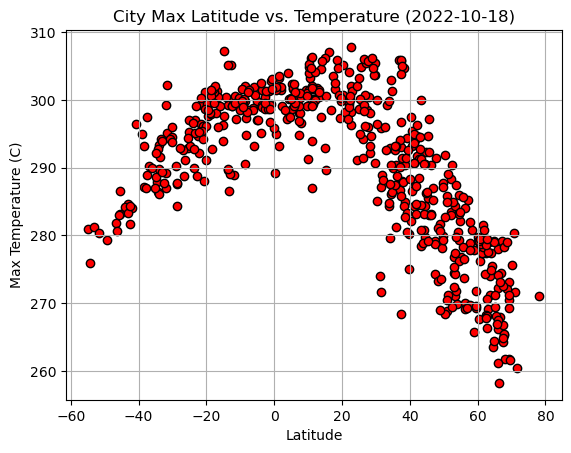

In [6]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],c='red',edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (C)')
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()

# Show plot
plt.show()

#### Latitude Vs. Humidity

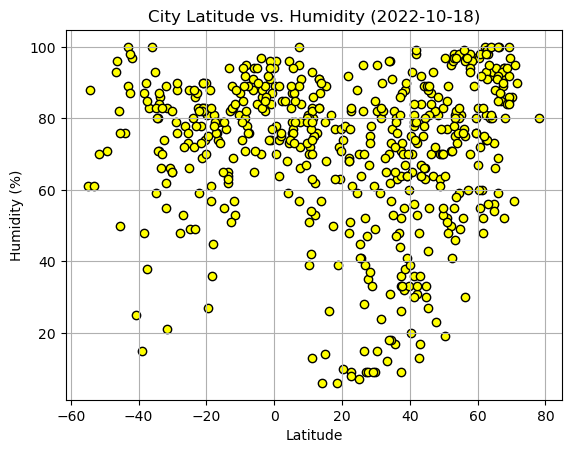

In [7]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],c='yellow',edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()


# Show plot
plt.show()

#### Latitude Vs. Cloudiness

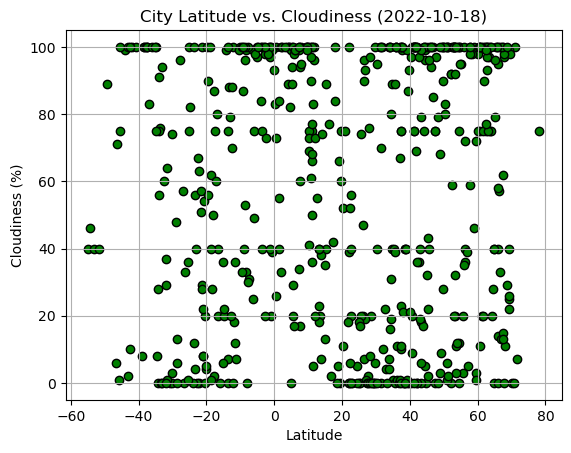

In [8]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],c='green',edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()


# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

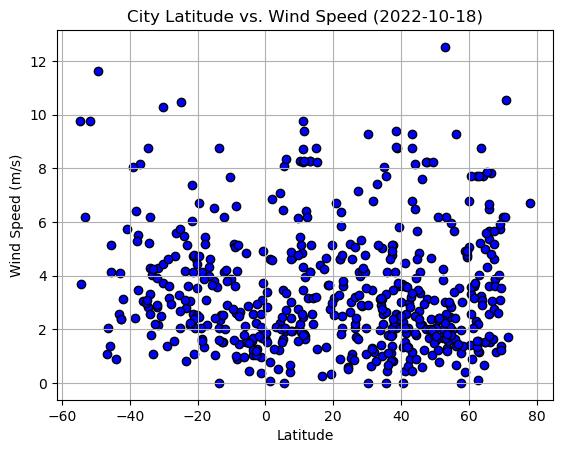

In [9]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],c='blue',edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [10]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san patricio,28.0170,-97.5169,300.46,67,76,4.00,US,1682626266
1,rumuruti,0.2670,36.5389,289.13,89,83,1.59,KE,1682626266
2,vilyuysk,63.7553,121.6247,271.26,92,100,3.25,RU,1682626266
4,ribeira grande,38.5167,-28.7000,290.37,88,40,9.39,PT,1682626267
5,tura,25.5198,90.2201,298.81,41,74,1.07,IN,1682625928


In [11]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,ubatuba,-23.4339,-45.0711,297.08,86,56,2.81,BR,1682626266
7,port saint john's,-31.6229,29.5448,295.06,83,64,4.28,ZA,1682625955
12,ushuaia,-54.8000,-68.3000,280.94,61,40,9.77,AR,1682625681
13,port-aux-francais,-49.3500,70.2167,279.26,71,89,11.64,TF,1682625885
16,adamstown,-25.0660,-130.1015,296.99,66,100,2.68,PN,1682625647


###  Temperature vs. Latitude Linear Regression Plot

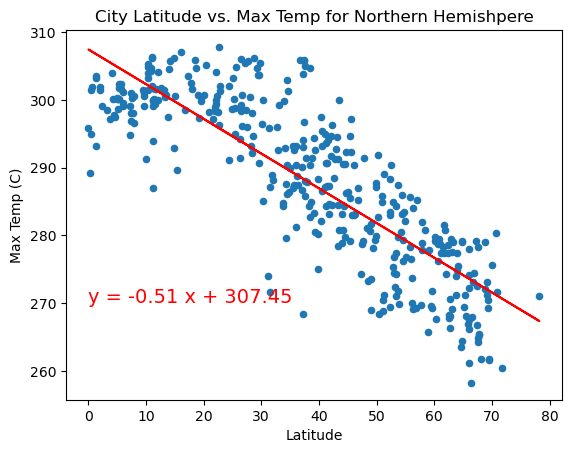

In [12]:
# Linear regression on Northern Hemisphere
linear_regression = linregress(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

northern_hemi_df.plot.scatter(x = 'Lat', y = 'Max Temp')

plt.plot(northern_hemi_df['Lat'],linear_equation,c='red')
plt.annotate(line_eq,(0,270),fontsize=14,c="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.title('City Latitude vs. Max Temp for Northern Hemishpere')
plt.show()

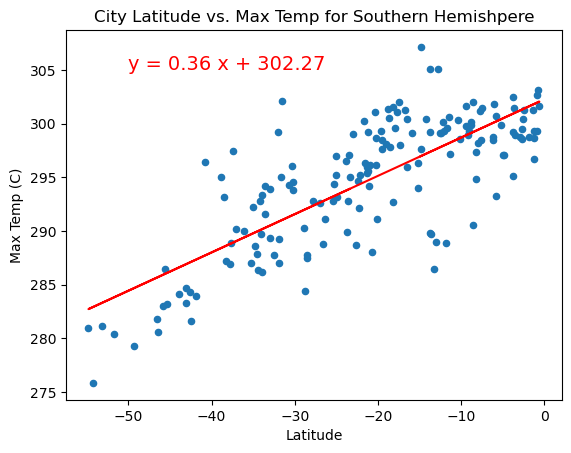

In [13]:
# Linear regression on Southern Hemisphere
linear_regression = linregress(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

southern_hemi_df.plot.scatter(x = 'Lat', y = 'Max Temp')

plt.plot(southern_hemi_df['Lat'],linear_equation,c='red')
plt.annotate(line_eq,(-50,305),fontsize=14,c="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.title('City Latitude vs. Max Temp for Southern Hemishpere')
plt.show()

### Humidity vs. Latitude Linear Regression Plot

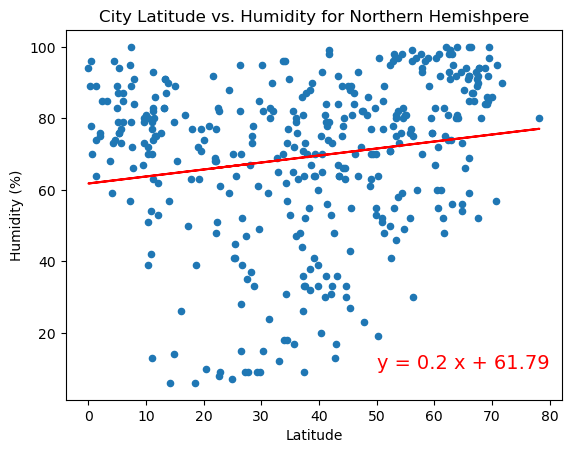

In [14]:
# Northern Hemisphere
linear_regression = linregress(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

northern_hemi_df.plot.scatter(x = 'Lat', y = 'Humidity')

plt.plot(northern_hemi_df['Lat'],linear_equation,c='red')
plt.annotate(line_eq,(50,10),fontsize=14,c="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity for Northern Hemishpere')
plt.show()

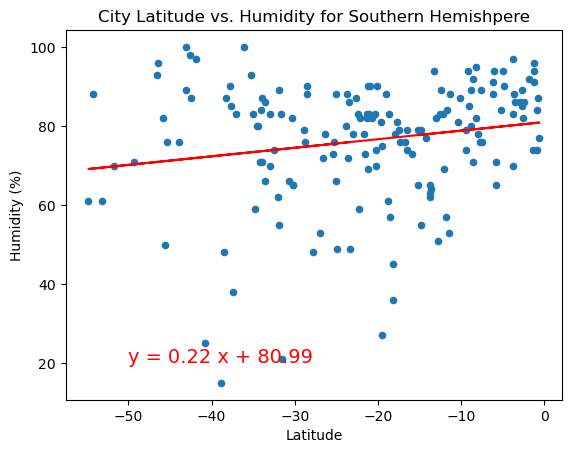

In [15]:
# Southern Hemisphere
linear_regression = linregress(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

southern_hemi_df.plot.scatter(x = 'Lat', y = 'Humidity')

plt.plot(southern_hemi_df['Lat'],linear_equation,c='red')
plt.annotate(line_eq,(-50,20),fontsize=14,c="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity for Southern Hemishpere')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

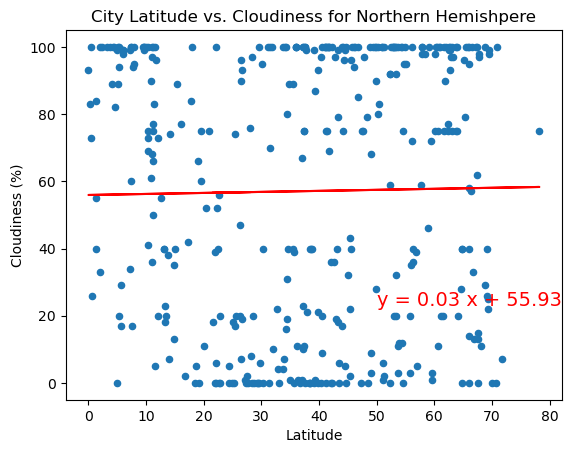

In [16]:
# Northern Hemisphere
linear_regression = linregress(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

northern_hemi_df.plot.scatter(x = 'Lat', y = 'Cloudiness')

plt.plot(northern_hemi_df['Lat'],linear_equation,c='red')
plt.annotate(line_eq,(50,23),fontsize=14,c="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness for Northern Hemishpere')
plt.show()

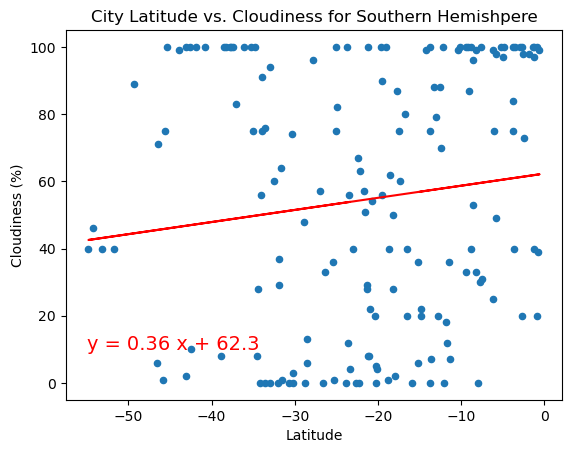

In [17]:
# Southern Hemisphere
linear_regression = linregress(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

southern_hemi_df.plot.scatter(x = 'Lat', y = 'Cloudiness')

plt.plot(southern_hemi_df['Lat'],linear_equation,c='red')
plt.annotate(line_eq,(-55,10),fontsize=14,c="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness for Southern Hemishpere')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

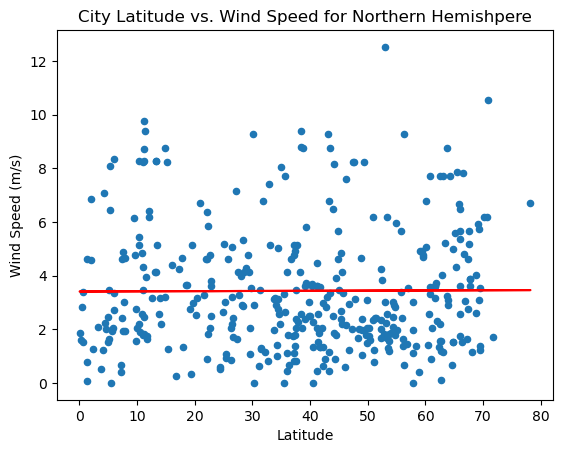

In [18]:
# Northern Hemisphere
linear_regression = linregress(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

northern_hemi_df.plot.scatter(x = 'Lat', y = 'Wind Speed')

plt.plot(northern_hemi_df['Lat'],linear_equation,c='red')
plt.annotate(line_eq,(50,23),fontsize=14,c="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed for Northern Hemishpere')
plt.show()

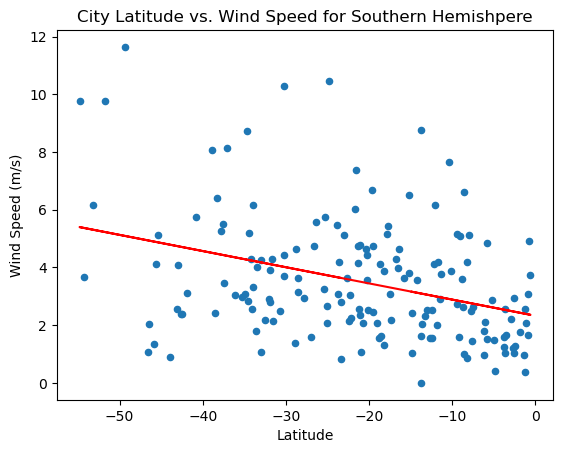

In [19]:
# Southern Hemisphere
linear_regression = linregress(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

southern_hemi_df.plot.scatter(x = 'Lat', y = 'Wind Speed')

plt.plot(southern_hemi_df['Lat'],linear_equation,c='red')
plt.annotate(line_eq,(-20,14),fontsize=14,c="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed for Southern Hemishpere')
plt.show()